# Week 10 - Discover associations between e-commerce purchases
*© 2020 Colin Conrad*

As before, I trust that you are all well and enjoying the end of term from the comfort of your couches. In this second lab we will expand on the concepts explored in Lab 9 and introduce you to the remaining core concept in data science: *data mining*. 

Data mining is the process of knowledge discovery from large data sets, and is perhaps the defining task of a data scientist. Data mining techniques include everything that you have learned so far: data processing, data structures and descriptive analytics and summarization. In addition, data mining may also employ classification and association rule learning, two techniques borrowed from machine learning. Unfortunately we will not have the ability to cover machine learning in depth in this course, but that won't stop us from employing it in our analysis!

**Note:** Some of you are probably reluctant to finish both of these final labs. While both labs will cover important data science content, *this is the harder of the two labs* and is most relevant to those who wish to do data mining and/or machine learning for their final project.

**This week, we will achieve the following objectives:**
- Analyze outliers
- Detect patterns among e-commerce transactions
- Predict e-commerce purchase trends
- Implement association rule mining

# Case: The Online Retail Data Set
This week's lab is based on the [Online Retail Data Set](https://archive.ics.uci.edu/ml/datasets/online+retail) provided by Dr. Daqing Chen through the UCI Machine Learning Repository. The dataset consists of roughly 500k transactions from a British e-commerce company which occurred between 01/12/2010 and 09/12/2011. The company is a gift and confectionary company and mainly sells to retailers.

When conducting data mining and machine learning analysis it is often important to have large datasets. The University of California Machine Learning Repository is a useful resource for finding datasets which are suited to these purposes. To learn more, visit their website: https://archive.ics.uci.edu/ml/index.php

# Objective 1: Analyze Outliers
The ultimate goal of data mining is to generate insights from the data. As such, outlier detection is particularly important. Outliers often considerably account for an organization's performance and this e-commerce company is no exception.

We will start by importing pandas and matplotlib so that we can do some visual analytics. We will specify a few more details related to encoding and data types so that we don't run into trouble.

In [1]:
import pandas as pd #import pandas as an object pd

import matplotlib.pyplot as plt

ec = pd.read_csv('data/w10_ec.csv', encoding="ISO-8859-1", dtype={'CustomerID': str,'InvoiceNo': str}) #we will name our dataframe ec
ec.head() #see the first five entries

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


This dataset consists of 541909 records and 8 columns. This is the largest dataset that we have explored so far, but still pretty far from 'big data'.

In [2]:
ec.shape

(541909, 8)

Let's visualize the `UnitPrice` to look for outliers in that column. Right away we can see that there are a small number of transactions which have over 1000 pounds in price. 

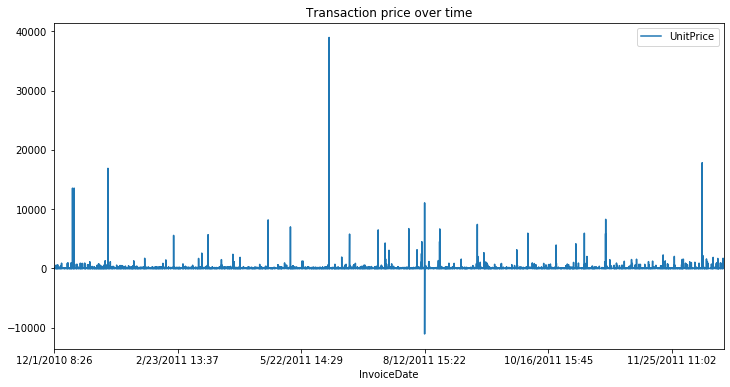

In [3]:
ec.plot(x='InvoiceDate', y='UnitPrice', figsize=(12,6), title='Transaction price over time')

Let's retrieve the subset of transactions which have over 1000 pounds as the UnitPrice. We could also learn that there are 122 transactions by using `.describe()`, which you can try if you would like! 

In [4]:
ec_outliers = ec[
                    (ec['UnitPrice'] > 1000) |
                    (ec['UnitPrice'] < -1000)
                ]

ec_outliers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15016,C537630,AMAZONFEE,AMAZON FEE,-1,12/7/2010 15:04,13541.33,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,12/7/2010 15:08,13541.33,NaN,United Kingdom
16232,C537644,AMAZONFEE,AMAZON FEE,-1,12/7/2010 15:34,13474.79,NaN,United Kingdom
16313,C537647,AMAZONFEE,AMAZON FEE,-1,12/7/2010 15:41,5519.25,NaN,United Kingdom
16356,C537651,AMAZONFEE,AMAZON FEE,-1,12/7/2010 15:49,13541.33,NaN,United Kingdom


In [5]:
ec_outliers.describe()

,Quantity,UnitPrice
count,122.000000,122.000000
mean,-0.090164,3759.296393
std,1.012354,5174.857618
min,-2.000000,-11062.060000
25%,-1.000000,1273.495000
50%,-1.000000,2043.085000
75%,1.000000,5062.682500
max,1.000000,38970.000000


What type of transactions are these? We can use the `.unique()` method to determine the number of unique values in the `Description` column. It is clear that these consist of overhead costs which were recorded as transactions in the data. Let's dig into the differences between these categories.

In [6]:
ec_outliers['Description'].unique()

array(['AMAZON FEE', 'Manual', 'Bank Charges', 'Discount', 'POSTAGE',
       'DOTCOM POSTAGE', 'Adjust bad debt', 'CRUK Commission'],
      dtype=object)

### Analyze outliers by description group
In the previous lab we learned about the `groupby()` method which can be used to group data by a nominal value. `Description` is one such value. By calculating the sum of unit price for each value, we can compare expenses between the categories. It is clear that `AMAZON FEE` is a considerable source of revenue for this company.

One immediate question I would have for the executives at this company is whether this represented a revenue or an expense. It seems strange that they are recorded as revenues; it is possible that they represent sales which were made on Amazon. However, this does not account for the fact that there are other fees represented as revenues (e.g. DOTCOM POSTAGE).

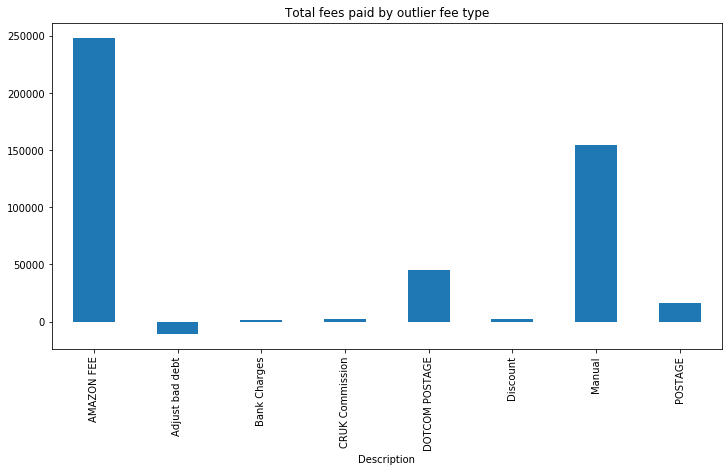

In [7]:
out_group = ec_outliers.groupby('Description')
out_group['UnitPrice'].sum().plot.bar(figsize=(12,6), title='Total fees paid by outlier fee type')

## Challenge Question 1 (2 points)
Though it is clear that Amazon Fees constitute the largest fee segment among the outliers, it is not clear whether any one Amazon fee was responsible for these expenses. Write code that provides the `Invoice Number`, `Description` and `UnitPrice` for the transaction which had the highest UnitPrice value.

In [8]:
out_group.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15016,C537630,AMAZONFEE,AMAZON FEE,-1,12/7/2010 15:04,13541.33,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,12/7/2010 15:08,13541.33,NaN,United Kingdom
16232,C537644,AMAZONFEE,AMAZON FEE,-1,12/7/2010 15:34,13474.79,NaN,United Kingdom
16313,C537647,AMAZONFEE,AMAZON FEE,-1,12/7/2010 15:41,5519.25,NaN,United Kingdom
16356,C537651,AMAZONFEE,AMAZON FEE,-1,12/7/2010 15:49,13541.33,NaN,United Kingdom
28994,C538682,M,Manual,-1,12/13/2010 17:14,1130.90,NaN,United Kingdom
41448,539856,M,Manual,1,12/22/2010 14:41,1298.40,NaN,United Kingdom
45622,C540271,M,Manual,-1,1/6/2011 11:51,1126.00,12503,Spain
64570,C541651,M,Manual,-1,1/20/2011 11:48,1283.80,NaN,United Kingdom
64573,C541653,BANK CHARGES,Bank Charges,-1,1/20/2011 11:50,1050.15,NaN,United Kingdom


As we can see from the head , there are a large number of `AMAZONFEE` types.

# Objective 2: Detect patterns among e-commerce transactions
With a better understanding of the `UnitPrice` outliers, it is time to analyze the main transactional data. We should start by removing the outlier data and analyzing only common transactions. We can create a subset called `ect` (e-commerce transactions) for this analysis. Let's visualize the `Quantity` column instead.

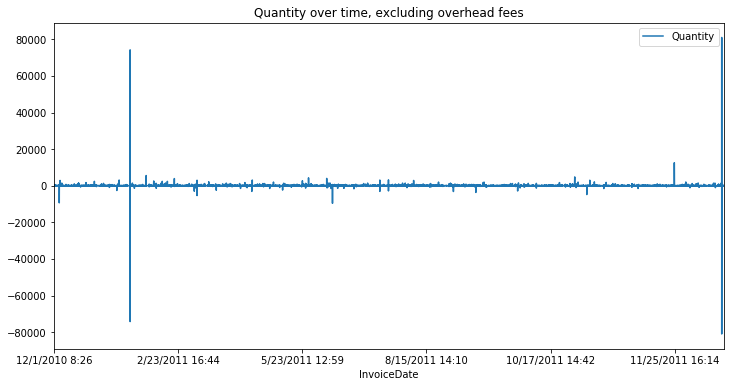

In [9]:
ect = ec[
            (ec['Description'] != 'AMAZON FEE') & 
            (ec['Description'] != 'Manual') &
            (ec['Description'] != 'Bank Charges') & 
            (ec['Description'] != 'Discount') &
            (ec['Description'] != 'POSTAGE') & 
            (ec['Description'] != 'DOTCOM POSTAGE') &
            (ec['Description'] != 'Adjust bad debt') & 
            (ec['Description'] != 'CRUK Commission')
        ]

ect.plot(x='InvoiceDate', y='Quantity', figsize=(12,6), title='Quantity over time, excluding overhead fees')

However, once again we realize that there outliers in Quantity as well, albeit far fewer. Let's retrieve orders with over 5000 quantity (or negative 5000 quantity) and investigate what these are.

In [10]:
ect_outliers = ect[
                    (ect['Quantity'] > 5000) |
                    (ect['Quantity'] < -5000)
                ]

ect_outliers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346,United Kingdom
74614,542504,37413,NaN,5568,1/28/2011 12:03,0.00,NaN,United Kingdom
115818,546152,72140F,throw away,-5368,3/9/2011 17:25,0.00,NaN,United Kingdom
225528,556687,23003,Printing smudges/thrown away,-9058,6/14/2011 10:36,0.00,NaN,United Kingdom
225529,556690,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,NaN,United Kingdom
225530,556691,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,NaN,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.00,13256,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446,United Kingdom


It seems that some of these are attributed to wasted product, while others are probably mistaken orders and their respective return. For instance, it seems highly unlikely that a wholesaler would deliberately purchase 74215 ceramic storage jars, as evidenced by the -74215 value that follows. We can discount these outliers during our analysis of the transactions as well. When we again visualize the results, it seems much cleaner.

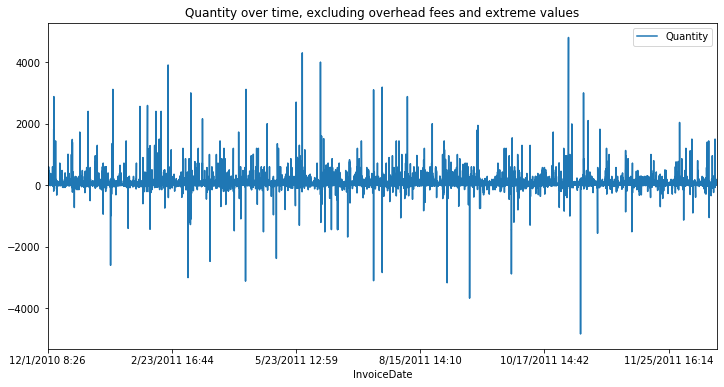

In [11]:
ectc = ect[
            (ect['Quantity'] < 5000) &
            (ect['Quantity'] > -5000)
         ]

ectc.plot(x='InvoiceDate', y='Quantity', figsize=(12,6), title='Quantity over time, excluding overhead fees and extreme values')

### Creating a calculated value
While `Quantity` and `UnitPrice` are valuable data, in order to assess the value of each transaction it would be valuable to know the `TransactionValue` which is the `UnitPrice` multiplied by `Quantity`. With this data we would be able to assess the revenue generated for each invoice or customer. However, our dataframe does not currently carry this calculated value.

In order to create a calculated value in Pandas we must iterate through each row of the dataframe. Pandas supports a method called `.apply()` which is designed for this task. Using `.apply()` we can apply simple functions to columns or rows of the dataframe to generated a calculated value. 

There are two types of functions which are supported by `.apply()`. The first are numpy functoins such as `.mean()` or `.sum()`. The second is called a `lambda`, which is sort of like a mini function in Python. In the code below we apply a `lambda` to calculate the `TransactionValue`.

**Note:** If you don't understand lambdas, don't worry about it, it is here mostly so that you can see it in action. Also, Jupyter may throw a waning at you for using the code below, this is because we made changes to the dataframe that the lambda references, which is not a best practice.

In [12]:
ectc['TransactionValue'] = ectc.apply(lambda row: row['UnitPrice'] * row['Quantity'], axis=1)

C:\Users\Colin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


This will give us a new row called TransactionValue, which we can use for analysis.

In [13]:
ectc.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


### Grouping Customers
By again using `.groupby()` we can now analyze the sales made to each customer. The code below grabs the `customer_sales`, which is the sum of `TransactionValue` for each customer and orders them from largest to smallest.

In [14]:
cust_group = ectc.groupby('CustomerID')
customer_sales = cust_group['TransactionValue'].sum().sort_values(ascending=False)

We can now visualize the data. Using a simple line plot we will see that there is a clear exponential relationship where a handful of customers account for most of the revenue. 

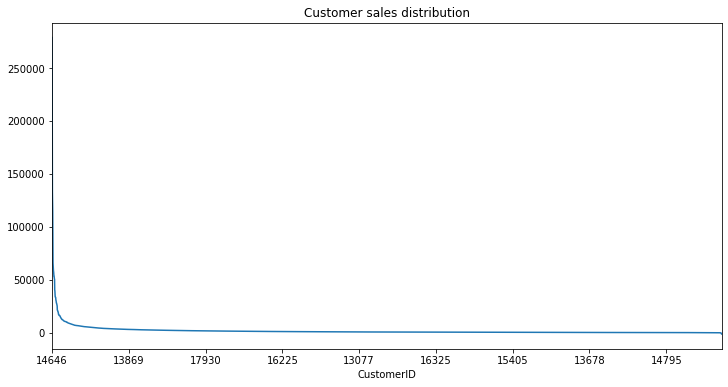

In [15]:
customer_sales.plot(figsize=(12,6), title='Customer sales distribution')

Let's compare the top 10 customers. The code below visualizes the top 10 customers using a bar plot. It seems that customers 14646, 18102 and 17450 account for a considerable number of the overall sales. 

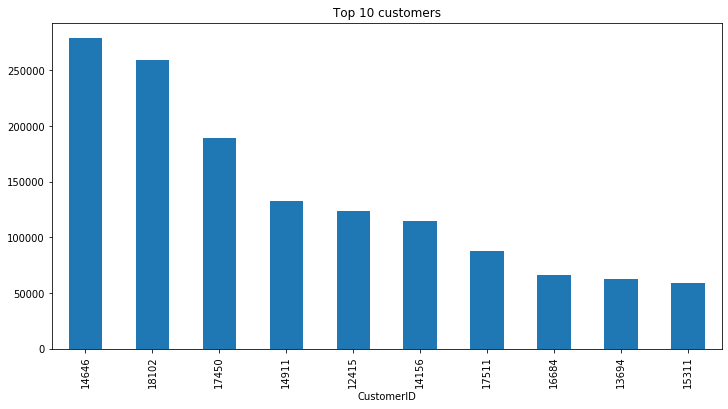

In [16]:
customer_sales[0:10].plot.bar(figsize=(12,6), title='Top 10 customers')

Let's conclude by analyzing the percentage of the overall sales these three customers account for. The code below takes the sum of sales from the top 3 customers and divides it by the sum of all of the customer sales. It seems that the top 3 customers accounted for nearly 9\% of the company's overall revenue.

In [17]:
percent_revenue = (customer_sales[0:3].sum()/customer_sales.sum()) * 100
print('Our top 3 customers accounted for ' + str(percent_revenue) + '% of our revenue.')

Our top 3 customers accounted for 8.779933866926964% of our revenue.


## Challenge Question 2 (2 points)
While insights about the top 3 customers are useful, it is also useful to generate insights about the top 10 customers. Create code that:
- Calculates the percent of overall revenue generated by the top 10 customers
- Calculates the percent of overall count of customers accounted for by the top 10 customers

This may yield insights into how this business should prioritize its customer relationships.

In [18]:
# insert your code here

In [19]:
# you may wish to use two cells for this one

# Objective 3: Predict e-commerce purchase trends
Let's shift gears to another data mining task: classification. Classification is an application of machine learning to predictive analytics. Using machine learning techniques, we can train an algorithm to identify trends in the data, with the goal of identifying some insight. There are many applications of this technique in this dataset, such as the identification of high value customers. In this example we will attempt to predict the country of origin of a customer.

It is often good to eliminate or represent null values in your dataset. In this case, we opted to drop any values that had a null in any of the columns. We can also perform advanced functions like counting values in the dataset. For instance, we can observe the breakdown of the countries represented in the data.

In [20]:
ectc.dropna(inplace = True) #drop the null values
ectc.shape

C:\Users\Colin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(405041, 9)

In [21]:
print(ectc['Country'].value_counts())

United Kingdom          361283
Germany                   9096
France                    8170
EIRE                      7479
Spain                     2468
Netherlands               2330
Belgium                   1971
Switzerland               1844
Portugal                  1436
Australia                 1257
Norway                    1060
Italy                      783
Channel Islands            756
Finland                    653
Cyprus                     619
Sweden                     437
Austria                    387
Denmark                    375
Japan                      355
Poland                     336
USA                        291
Israel                     250
Unspecified                244
Singapore                  215
Iceland                    182
Canada                     150
Greece                     142
Malta                      123
United Arab Emirates        67
European Community          58
RSA                         57
Lebanon                     45
Lithuani

Our data is rather imbalanced, with the majority of the orders from the United Kingdom. This may create problems for us later, if we are going to build a classification algorithm. 

We should also observe our data types. Classification algorithms (as with all machine learning) can only understand values that are represented numerically. Though there may be good information contained in the descriptions, we would have to add additional analysis to process the text data. For example, we could use word tokens like we did in Lab 7. However, this lab is already quite complicated, so we should keep it simple.

In [22]:
ectc.dtypes

InvoiceNo            object
StockCode            object
Description          object
Quantity              int64
InvoiceDate          object
UnitPrice           float64
CustomerID           object
Country              object
TransactionValue    float64
dtype: object

We can cut our dataframe down easily by taking a subset. Let's take a subset with just the numerical values and the country values, and see if we can build a predictive model on those alone.

In [23]:
new_ec = ectc[['Quantity', 'UnitPrice', 'Country']]

In [24]:
new_ec.head()

,Quantity,UnitPrice,Country
0,6,2.55,United Kingdom
1,6,3.39,United Kingdom
2,8,2.75,United Kingdom
3,6,3.39,United Kingdom
4,6,3.39,United Kingdom


### Apply logistic regression to an imbalanced dataset
Let's start by exploring a basic predictive algorithm. Logistic regression is one of many regression models designed to best fit the data using a predefined method. If you are familiar with statistics or economics, you probably already understand how it works--we are just using a logistic regression library built in `scikit-learn`, one of python's machine learning libraries. We will use this to start our classification analysis. Let's begin by importing the model from scikit. We will save the model in the variable `clf`, as per scikit-learn's conventions.

In [25]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial') #the classification model

The classification models we will use here belong in the category of *supervised learning*. Supervised learning algorithms need data and labels to learn from them. In our case, we will need to take part of our data as a *training set*. Though there are many ways that you can do this, one simple method is to take the majority of the dataset for training, and save a minority for testing. The author of this tutorial is lazy, so he will just take the first 300 000, which is roughly 3/4 of this dataset. We will use the last 1/4 for testing.

In [26]:
train = new_ec[:300000] #take the first 300 000 and save it in train
test = new_ec[300000:] #take what remains and save it in test

print("Train: " + str(len(train)) + " Test: " + str(len(test)))

Train: 300000 Test: 105041


The next step is to *fit* the model. We saved the model as the variable `clf`, so it's just a matter of fitting our training data to the model. Typically, you fit the model by specifying first the data that the model is assessing, followed by the labels. We will do this by telling it to observe the columns that are not 'Country' for the model, while using the 'Country' values as labels. 

**Note:** this may take a minute or two on some computers.

In [27]:
clf.fit(train.loc[:, train.columns != 'Country'], train['Country']) #the 'non-country' columns are inputs while 'country' is the label

KeyboardInterrupt: 

The model is trained! We can now tell the model to predict values based on inputs. Let's save the predictions as the `preds` variable. We will print some of the output to make sure that it is working.

In [ ]:
preds = clf.predict(test.loc[:, test.columns != 'Country'])
print(preds[1])

In machine learning research, there are multiple measures that you can use to determine whether an algorithm is good. One of the most common measures is the algorithm's *accuracy*, which can be defined as the ratio of true values to the data overall. We can import an accuracy_score function from scikit learn to make this easy. 

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(preds, test['Country']) #measure accuracy of preds versus the test values

**90 percent accuracy! These are amazing results!** *Or are they?*

One problem with accuracy measures is that there could be an underdetermining factor that drives high accuracy results. Earlier we noticed that the data was weighted heavily toward one country. Let's look closer at our predictions.

In [ ]:
import collections
collections.Counter(preds)

**Our model seems to have simply classified most of the data as "United Kingdom"**. Let's see how close that was to reality.

In [ ]:
collections.Counter(test['Country'])

Clearly there was more variance than what the algorithm discovered... and a six year old could have come up with this solution. Given that there are 106 829 values in the test dataset, our 90% accuracy is an illusion--the results are no better than random chance. This is a very common issue with imbalanced datasets, as the algorithms used might detect a simple solution: select the majority. If we are going to have meaningful results, we should consider digging deeper and rebalancing the data.

### Apply logistic regression to a balanced dataset
If we want to eventually develop some sort of predictive algorithm, we should consider balancing the dataset. One simple way for us to do that is to cut down the number of UK values of the other countries. We can observe the number of instances that were not 'United Kingdom' by using the `value_counts` function below.

In [ ]:
(new_ec['Country'] != 'United Kingdom').value_counts() # how many times values other than 'United Kingdom' appear

With this we can further process our data by dividing it between the "UK" subset and the "not UK" subset. We would want to do this because we want to cut down on the data, but only that data which has the label of "United Kingdom". With pandas this is really easy; we just specify the subset conditions.

In [ ]:
ec_uk = new_ec[new_ec['Country'] == 'United Kingdom']
ec_others = new_ec[new_ec['Country'] != 'United Kingdom']

With a separate data frame, we can use the sample function that is contained in the pandas dataframe class. We can thus take a random sample. 

In [ ]:
ec_uk_under = ec_uk.sample(44951) # the number of values for not 'United Kingdom'
new_ec = pd.concat([ec_uk_under, ec_others]) #bring the disparate data together
collections.Counter(new_ec['Country']) #show the countries

We can further simplify our task by reducing the number of classes to two. Many classification algorithms (such as support vector machines) are designed to be binary classifiers, so are optimized for exactly two classes. One way we can do this is to distinguish domestic orders from foreign orders. We can do this be changing all foreign orders to 'Other Country'. The way to do this in Pandas is to use the `.loc()` method.

In [ ]:
new_ec.loc[new_ec['Country'] != 'United Kingdom', 'Country'] = 'Other Country' #select the values other than United Kingdom and make them one value 

In [ ]:
collections.Counter(new_ec['Country']) #list all of the country data

In [ ]:
new_ec.shape #shape of the new data frame

Finally, when we appended the two halves of our dataset, we essentially added our reduced 'United Kingdom' set to the end of our 'Other Country' set. We should shuffle them before beginning classification, or else our results will be biased by our distribution.   

In [ ]:
rand_ec = new_ec.sample(frac=1) #take a random fraction of 100% of the data frame. We could use frac = 0.1 to take a random 10%

**We're now ready to try Logistic Regression again!** As before, we will divide them into a train and test before fitting the algorithm. Let's try this again and see how we fare. 

In [ ]:
train = rand_ec[:60000] #60000, approximately 2/3 of the data
test = rand_ec[60000:]

print("Train: " + str(len(train)) + " Test: " + str(len(test)))

In [ ]:
clf.fit(train.loc[:, train.columns != 'Country'], train['Country'])

We are now ready to make predictions, as before. Let's test it on the test dataset and record the accuracy.

In [ ]:
preds = clf.predict(test.loc[:, test.columns != 'Country'])

In [ ]:
accuracy_score(preds, test['Country'])

**57 percent accuracy-- terrible**.  

This is certainly not better than random chance. Let's break this down a bit more using the confusion matrix. The confusion matrix will show the number of items classified as 'Other Country' on the left, followed by those which were classified as 'United Kingdom' on the right. The items that were actually 'Other Country' are on the top, while those which were actually 'United Kingdom' are on the bottom. This is very useful to seeing the breakdown of our classifier and what went wrong. In our case, it is clear that our classifier identified far too many as 'United Kingdom'.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test['Country'], preds) #shows the confusion matrix

In [ ]:
collections.Counter(preds) #show the sollectoin of predicted countries

Let's try some other techniques before calling it a day.

### Naive Bayes
A second technique we can try is called Naive Bayes. This is a probabilistic classifier based on Bayes Theorem. It is primarily used in text analysis, but can be used in our context as well. Let's train this classifier using the same code as before. We end up with an even worse result using Naive Bayes.

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(train.loc[:, train.columns != 'Country'], train['Country'])

In [ ]:
preds = clf.predict(test.loc[:, test.columns != 'Country'])
accuracy_score(preds, test['Country'])

In [ ]:
confusion_matrix(test['Country'], preds)

In [ ]:
collections.Counter(preds)

### Random Forest
A third technique we can try is called random forest. This classifier belongs to the category called decision trees, which create an algorithm based on the information gained. They are called 'forests' because they are actually the average of many decision trees. Using random forest, we get over 64% accuracy, which is an improvement. Though nothing to write home about, this is on the path to usefulness.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(train.loc[:, train.columns != 'Country'], train['Country'])

In [ ]:
preds = clf.predict(test.loc[:, test.columns != 'Country'])
accuracy_score(preds, test['Country'])

In [ ]:
confusion_matrix(test['Country'], preds)

In [ ]:
collections.Counter(preds)

There is one more simple technique which we could try, but I will leave this up to you.

## Challenge Question 3 (3 points)
The fourth technique that we can easily try is  called support vector machines. Similarly to regression, this classifier envisions the data as points in space on a plane and tries to fit the data as best possible. Unlike regression, it plots on a hyperplane, using a kernel function that is specified by the user. We will use the default radial basis function kernel for classification.

Using the code above and [scikit-learn's SVM documentation](https://scikit-learn.org/stable/modules/svm.html), implement the SVM classifier on the country classification task. Be sure to print the classifier's accuracy.

In [ ]:
# insert your code here

# Objective 4: Implement Association Rule Mining

The final data mining technique which is worth exploring is association rule mining. The algorithm that we will explore is called the **apriori** algorithm. 

The apriori association mining algorithm is a simple frequency item set mining algorithm, most commonly used to find associations over a transactional database. In the 1990s and early 2000s, this algorithm was used to discover a lot of data mining "gems" -- unexpected associations between purchases and behaviours. Today it is still commonly used by retailers and e-commerce companies to look at purchasing patterns. 

The algorithm looks at all of the transactions in a dataset and returns the most common associations between the items. It uses three measures: **support**, **confidence** and **lift**. Support describes the number of occurrences in the dataset. Confidence is how often the association is found to be true. Lift is the ratio of observed support to the independent observations of the items in the association. [The Wikipedia page gives a more detailed explanation](https://en.wikipedia.org/wiki/Association_rule_learning).

### Installing the Apyori Library

Before we can get started, we will need to install the apyroi library. Yes, you read that right... aPYori. Python has no shame.

In [29]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


Unfortunately, the apyori library is not designed to work with pandas easily. As such, we will go back to good old lists. *Warning* this may make you nostalgic for a better time.

In [30]:
import csv #import the csv library for loading csv type files
from apyori import apriori #import the apriori library

ec = [] # we will declare a list to store the data

with open('data/w10_ec.csv', newline='') as csvfile:
    datareader = csv.reader(csvfile, delimiter=',', quotechar='|') 
    for row in datareader: 
        ec.append(row)

As before, it's usually a good practice to see the data we are looking at. Let's see how the data is structured.

In [31]:
print(ec[4]) #prints the fifth item

['536365', '84029G', 'KNITTED UNION FLAG HOT WATER BOTTLE', '6', '12/1/2010 8:26', '3.39', '17850', 'United Kingdom']


Using the apyori library is simple. We simply call then apriori function on the dataset and it will create a bunch of associations for us. Let's do that, while saving the associations as the "associations" list. Let's print it to see what the associations look like.

In [32]:
associations = list(apriori(ec)) #use the apriori function to create associations

In [33]:
print(associations) #print the associations

[RelationRecord(items=frozenset({''}), support=0.2492664833643963, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({''}), confidence=0.2492664833643963, lift=1.0)]), RelationRecord(items=frozenset({'1'}), support=0.27377239763060285, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'1'}), confidence=0.27377239763060285, lift=1.0)]), RelationRecord(items=frozenset({'12'}), support=0.11268291782768357, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'12'}), confidence=0.11268291782768357, lift=1.0)]), RelationRecord(items=frozenset({'2'}), support=0.15101216069088963, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'2'}), confidence=0.15101216069088963, lift=1.0)]), RelationRecord(items=frozenset({'United Kingdom'}), support=0.9143178756620103, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'United Kingdom'}), confidence=

Wait! This is <u>not readable at all!</u>. By simply printing the list, we retrieved direct output from the associations. We can't use this on any sort of report! 

That said, we can sort of make out the details of the output. You can see the associations, support and confidence values. These are saved as lists within the list of associations. One way to manage this data is to only print the elements that we need, one by one. Let's loop through the results and only print the relevant data.

In [34]:
for a in associations: #loop through each association directly
    #corresponds to the list values for association, the support and the confidence.
    print("Association: " + str(list(a[0])) + ", Support: " + str(a[1]) + ", Confidence: " + str(a[2][0][2]))

Association: [''], Support: 0.2492664833643963, Confidence: 0.2492664833643963
Association: ['1'], Support: 0.27377239763060285, Confidence: 0.27377239763060285
Association: ['12'], Support: 0.11268291782768357, Confidence: 0.11268291782768357
Association: ['2'], Support: 0.15101216069088963, Confidence: 0.15101216069088963
Association: ['United Kingdom'], Support: 0.9143178756620103, Confidence: 0.9143178756620103
Association: ['', '1'], Support: 0.1383181709139894, Confidence: 0.1383181709139894
Association: ['', 'United Kingdom'], Support: 0.24653540255762027, Confidence: 0.24653540255762027
Association: ['1', 'United Kingdom'], Support: 0.2699267406026831, Confidence: 0.2699267406026831
Association: ['United Kingdom', '2'], Support: 0.14481925042903804, Confidence: 0.14481925042903804
Association: ['', '1', 'United Kingdom'], Support: 0.13803768153383403, Confidence: 0.13803768153383403


That's better. However, it also revealed another problem. We only have 10 association rules.

This was caused by the apriori functions default values. By default, it only collects support above 0.1. This is far too low for our dataset, as there is a lot of variance in the purchases. We can override the default by stating it in the function. Let's try lowering it to 0.002 ... patterns that happen at least 1000 times in our dataset (<u>warning: this may take about a minute to process on some computers</u>).

In [35]:
associations = list(apriori(ec, min_support=0.002))
print(len(associations))

765


We can once again look through these associations by looping and printing. Let's do that.

In [36]:
for a in associations:
    print("Association: " + str(list(a[0])) + ", Support: " + str(a[1]) + ", Confidence: " + str(a[2][0][2]))

Association: [''], Support: 0.2492664833643963, Confidence: 0.2492664833643963
Association: ['-1'], Support: 0.007720839253750623, Confidence: 0.007720839253750623
Association: ['-2'], Support: 0.0025742281928733553, Confidence: 0.0025742281928733553
Association: ['0'], Support: 0.0046409920466498125, Confidence: 0.0046409920466498125
Association: ['0.19'], Support: 0.0035153438762894206, Confidence: 0.0035153438762894206
Association: ['0.21'], Support: 0.002147958148031961, Confidence: 0.002147958148031961
Association: ['0.29'], Support: 0.008167407872155892, Confidence: 0.008167407872155892
Association: ['0.39'], Support: 0.015214703548559723, Confidence: 0.015214703548559723
Association: ['0.42'], Support: 0.04527135502205163, Confidence: 0.04527135502205163
Association: ['0.55'], Support: 0.014137033824804857, Confidence: 0.014137033824804857
Association: ['0.65'], Support: 0.01450609879869351, Confidence: 0.01450609879869351
Association: ['0.72'], Support: 0.002278976213762433, Co

Better still. If you scroll down, we see some interesting patterns start to emerge, such as:
<ul>
    <li>'United Kingdom', 'ASSORTED COLOUR BIRD ORNAMENT'</li>
    <li>'United Kingdom', 'WHITE HANGING HEART T-LIGHT HOLDER'</li>
    <li>'United Kingdom', '4.95', '47566', 'PARTY BUNTING'</li>
</ul>
Though interesting that some products are purchased from the UK at a certain price, it is clear that there is something missing. Typically, basket analysis is conducted <i>on baskets</i>. We seem to have output that is improperly structured for this task.

### Conduct basket analysis
One option is to restructure the data. Fortunately, we are using a programming language, so this step is relatively simple. We can create a simple script that creates a new list of baskets for association mining. The script below does this and finishes by reporting the number of basket associations produced.

In [37]:
i = 1
basket = [] #specify a list for basket items
baskets = [] #a list of baskets
invoice = ec[1][0] #a placeholder for the previous invoice number

while i < len(ec): #iterate through each item sequentially
    if ec[i][0] != invoice: #if this is a new invoice
        baskets.append(basket) #append the baskets
        basket = [] #start a new basket
    basket.append(ec[i][2]) #add this item to basket
    invoice = ec[i][0] #specify this current invoice as the new previous invoice
    i += 1 #iterate to the next item

len(baskets)

25900

As before, we can use the apriori function to create the associations and the print statement to print the results. Let's only print results that also have a confidence of greater than 50%, meaning that at least half of the time, these things are purchased together.

In [38]:
basket_associations = list(apriori(baskets, min_support=0.02))

for a in basket_associations:
    if len(a[0]) > 1: # we are only interested in baskets with more than one item in it
        if a[2][1][2] > 0.5: # confidence of at least 0.5
            print("Association: " + str(list(a[0])) + ", Support: " + str(a[1]) + ", Confidence: " + str(a[2][1][2]))

Association: ['ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK BAKELIKE RED '], Support: 0.024903474903474904, Confidence: 0.645
Association: ['CHARLOTTE BAG PINK POLKADOT', 'RED RETROSPOT CHARLOTTE BAG'], Support: 0.020308880308880308, Confidence: 0.6921052631578947
Association: ['SPACEBOY LUNCH BOX ', 'DOLLY GIRL LUNCH BOX'], Support: 0.020772200772200773, Confidence: 0.6255813953488373
Association: ['GARDENERS KNEELING PAD CUP OF TEA ', 'GARDENERS KNEELING PAD KEEP CALM '], Support: 0.021196911196911198, Confidence: 0.7176470588235294
Association: ['PINK REGENCY TEACUP AND SAUCER', 'GREEN REGENCY TEACUP AND SAUCER'], Support: 0.024864864864864864, Confidence: 0.609271523178808
Association: ['ROSES REGENCY TEACUP AND SAUCER ', 'GREEN REGENCY TEACUP AND SAUCER'], Support: 0.03027027027027027, Confidence: 0.7417218543046358
Association: ['JUMBO BAG RED RETROSPOT', 'JUMBO  BAG BAROQUE BLACK WHITE'], Support: 0.022895752895752897, Confidence: 0.6261879619852165
Association: ['JUMBO BAG RED RET

This is much more powerful information. The way that apyori is structured is quite confusing however the code above simplifies it by retrieving the confidence of the first association in the list.

We can see that, for instance, that the purchase of 'PINK REGENCY TEACUP AND SAUCER' is purchased with 'GREEN REGENCY TEACUP AND SAUCER' 60% of the time. From the perspective of marketing, we could use this information to learn more about those customers and why they are purchasing so many saucers, and what are their motivations for doing so at that point in time.

What other associations are out there? Feel free to play with the variables in this code to find new results!

## Challenge Question 4 (3 points)
Re-analyze the basket associations to analyze baskets with at least 1\% support and a lift of 15. Do you think these associations would be useful? 

In [39]:
# insert your code here

## References

Chen, D. , Sain, S. L., Guo, K. (2012). Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining. *Journal of Database marketing and Customer Strategy Management, 19*(3), 197-208.

Li, Q., Guan, X., Wu, P., Wang, X., Zhou, L., Tong, Y., ... & Xing, X. (2020). Early transmission dynamics in Wuhan, China, of novel coronavirus–infected pneumonia. New England Journal of Medicine.

The Pandas Development Team (2020). Visualization. Retrieved from: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html